In [1]:
#Uncomment this to mount file system if you are running on Googl Colab
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#Load cv2_imshow from google colab instead of cv.imshow. The latter causes jupyter notebook to crash
from google.colab.patches import cv2_imshow
import random

In [0]:
#run this if working on Colab
os.chdir("/content/gdrive/My Drive/Crop Disease")

## Load the model and the label binarizer

In [0]:
# load the trained convolutional neural network and the label binarizer
#loading the model can only work after training the model
#the model name might be different everytime you train it
model = load_model("./saved models/saved-model-05-0.26.hdf5")
lb = pickle.loads(open("./saved models/weights1.pickle", "rb").read())

## Classifier one Image

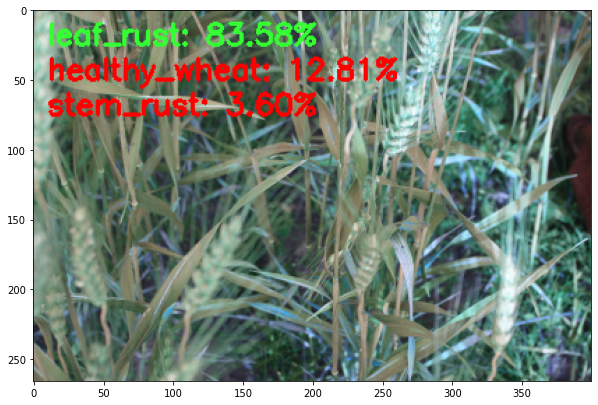

In [21]:
#Draw the image randomly from the test folder
file_name = random.choice(os.listdir("./test"))
#read the image
image = cv2.imread(os.path.join("./test",file_name))
#make a copy for display purpose
#image read will be resized to fit the required size of the model that was trained
output = image.copy()
# pre-process the image for classification
image = cv2.resize(image, (224, 224)) #make sure the image is resized into the input size of the model
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]
#print("Filename:", file_1)
# Display the output: image and the label plus probs
label = "{}: {:.2f}%".format(label, proba[idx] * 100) 
#print(lb.classes_)
output = imutils.resize(output, width=400)
#writing up the probabilities on the image
j=0
for t in range(len(list(proba))):
    if t not in [idx]:
        label1=lb.classes_[t]
        label1 = "{}: {:.2f}%".format(label1, proba[t] * 100)
        cv2.putText(output, label1, (10, 50+j),  cv2.FONT_HERSHEY_SIMPLEX,	0.7, (255, 0, 0), 2)
        j=j+25

cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,	0.7, (51, 255, 51), 2)
plt.figure(figsize=(10,10))
plt.imshow(output)

## Classifier all the images in the test folder

In [0]:
from random import randint
#os.mkdir("/content/gdrive/My Drive/CNN/results")
test_path=os.path.join("./test")
test_files=[]
for Dir,subDir,filesList in os.walk(test_path):
  for index,files in enumerate(filesList):
      test_files.append(files)
      
      

In [8]:

for index,i in enumerate(test_files):
    done=[]
    #this loop is just to take care of cases when the programs fails along the way
    for Dir,subdir,filesList in os.walk("./output"):
        for files in filesList:
          done.append(files)
    if i in done:
        print("{} {} already processed.".format(index,i))
    else:
        #actual classfication happens here
        # load the image
        #file_1=test_files[randint(0,600)]
        #file_1="YJDMJX.jpg"
        image = cv2.imread(os.path.join("./test/",i))
        output = image.copy()
        # pre-process the image for classification
        image = cv2.resize(image, (224, 224))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        # load the trained convolutional neural network and the label
        # binarizer
        #print("[INFO] loading network...")
        # classify the input image
        #print("[INFO] classifying image...")
        proba = model.predict(image)[0]
        idx = np.argmax(proba)
        label = lb.classes_[idx]
        #print("Filename:", file_1)
        # Display the output: image and the label plus probs
        label = "{}: {:.2f}%".format(label, proba[idx] * 100) 
        #print(lb.classes_)
        output = imutils.resize(output, width=400)
        j=0
        for t in range(len(list(proba))):
          if t not in [idx]:
            label1=lb.classes_[t]
            label1 = "{}: {:.2f}%".format(label1, proba[t] * 100)
            cv2.putText(output, label1, (10, 50+j),  cv2.FONT_HERSHEY_SIMPLEX,	0.7, (0, 0, 255), 2)
            j=j+25

        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,	0.7, (51, 255, 51), 2)
        try:
          cv2.imwrite(os.path.join("./output/",i),output)
        except:
          img_=i[:-5]
          cv2.imwrite(os.path.join("./output/",img_,".jpg"),output)
          #print("Warning. Image saved as .jpg")

0 X1UJGJ.jpg already processed.
1 QP94SG.JPG already processed.
2 QJE37W.jpg already processed.
3 N567QP.jpg already processed.
